In [ ]:
#Niyati Srivastava
#m22ai593
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:

train_val_dir = "C:\\Users\\chand\\Downloads\\charts\\charts\\train_val"
test_dir = "C:\\Users\\chand\\Downloads\\charts\\charts\\test"
train_path_labels = "C:\\Users\\chand\\Downloads\\charts\\charts\\train_val.csv"
train_val_labels = pd.read_csv(train_path_labels)

In [ ]:
train_val_labels

,image_index,type
0,0,vbar_categorical
1,1,vbar_categorical
2,2,vbar_categorical
3,3,vbar_categorical
4,4,vbar_categorical
...,...,...
995,995,dot_line
996,996,dot_line
997,997,dot_line
998,998,dot_line


In [ ]:

images = []
labels = []
for filename in os.listdir(train_val_dir):
 if filename.endswith('.png'):
     
     img = cv2.imread(os.path.join(train_val_dir, filename))
     img = cv2.resize(img, (128, 128))
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    
     img_array = np.array(img)
     
     images.append(img_array)
     labels.append(filename)


le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:

images = np.array(images)
labels = np.array(labels)

np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [ ]:

x_train.shape

(1000, 128, 128, 3)

In [ ]:

x_train[:5]
y_train[:5]


array([0, 1, 2, 3, 4], dtype=int64)

In [ ]:

images = []
labels = []
for filename in os.listdir(test_dir):
 if filename.endswith('.png'):
     
     img = cv2.imread(os.path.join(test_dir, filename))
     img = cv2.resize(img, (128, 128))
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    
     img_array = np.array(img)
     
     images.append(img_array)
     labels.append(filename)

le = LabelEncoder()
labels = le.fit_transform(labels)


In [ ]:
images = np.array(images)
labels = np.array(labels)

np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [ ]:
x_test.shape

(50, 128, 128, 3)

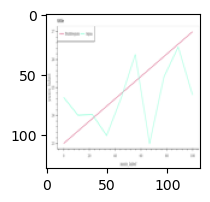

In [ ]:

plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])


In [ ]:

image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]

label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])
y_train
y_train.shape
y_test.shape

(50,)

In [ ]:

def image_sample(x, y, index):
 plt.figure(figsize = (10,2))
 plt.imshow(x[index])

 plt.xlabel(image_classes[y[index]])

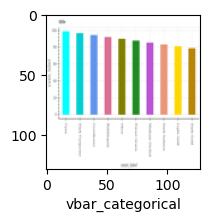

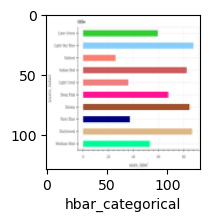

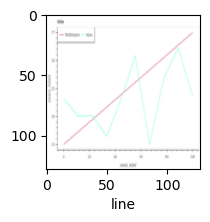

In [ ]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,444)

In [ ]:


x_train=x_train /255
x_test=x_train /255

In [ ]:

y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']
y_train_type[:5]


0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [ ]:

model = Sequential([
 Flatten(input_shape=(128,128,3)),
 Dense(3000, activation='relu'),
 Dense(1000, activation='relu'),
 Dense(5, activation='softmax')
])

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 30s 882ms/step - loss: 6.2665 - accuracy: 0.2090
Epoch 2/10
32/32 [==============================] - 30s 926ms/step - loss: 1.6210 - accuracy: 0.2280
Epoch 3/10
32/32 [==============================] - 32s 976ms/step - loss: 1.5895 - accuracy: 0.2540
Epoch 4/10
32/32 [==============================] - 28s 876ms/step - loss: 1.5910 - accuracy: 0.2720
Epoch 5/10
32/32 [==============================] - 28s 875ms/step - loss: 1.5331 - accuracy: 0.2870
Epoch 6/10
32/32 [==============================] - 31s 951ms/step - loss: 1.6257 - accuracy: 0.2140
Epoch 7/10
32/32 [==============================] - 27s 856ms/step - loss: 1.6031 - accuracy: 0.2040
Epoch 8/10
32/32 [==============================] - 28s 874ms/step - loss: 1.6068 - accuracy: 0.2280
Epoch 9/10
32/32 [==============================] - 27s 838ms/step - loss: 1.5963 - accuracy: 0.2580
Epoch 10/10
32/32 [==============================] - 19s 580ms/step - loss: 1.5903 - accura

In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 112ms/step - loss: 1.5740 - accuracy: 0.1900


[1.5739604234695435, 0.1899999976158142]

In [ ]:

y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]


7/7 [==============================] - 1s 91ms/step


In [ ]:

print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)


Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 1.6309 - accuracy: 0.2362 - val_loss: 2.4824 - val_accuracy: 0.2200
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 2.6513 - accuracy: 0.1950 - val_loss: 2.1004 - val_accuracy: 0.1900
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 2.0746 - accuracy: 0.2025 - val_loss: 1.9527 - val_accuracy: 0.2400
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 1.9077 - accuracy: 0.1900 - val_loss: 1.7907 - val_accuracy: 0.1650
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 1.7273 - accuracy: 0.2087 - val_loss: 1.6804 - val_accuracy: 0.1650
Epoch 6/50
1/1 [==============================] - 3s 3s/step - loss: 1.6158 - accuracy: 0.2087 - val_loss: 1.5917 - val_accuracy: 0.3400
Epoch 7/50
1/1 [==============================] - 4s 4s/step - loss: 1.5460 - accuracy: 0.3925 - val_loss: 1.5139 - val_accuracy: 0.3400
Epoch 8/50
1/1 [=========================

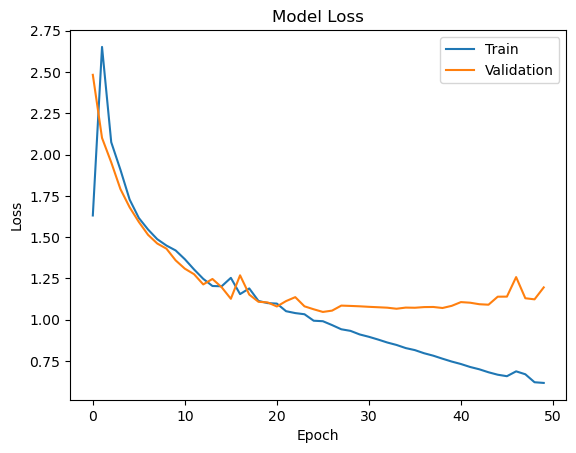

In [ ]:

cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 54ms/step - loss: 1.1956 - accuracy: 0.5400


[1.1955851316452026, 0.5400000214576721]

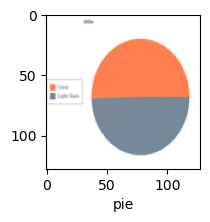

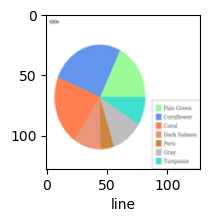

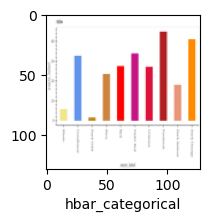

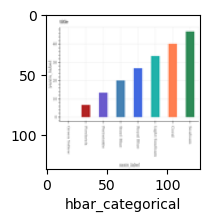

In [ ]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [ ]:

y_pred = cnn_model.predict(x_test)
y_pred[:5]

7/7 [==============================] - 0s 37ms/step


array([[3.27717185e-01, 4.22740489e-01, 1.52961910e-01, 2.14561895e-02,
        7.51241371e-02],
       [5.02760373e-02, 1.47415306e-02, 1.46054011e-03, 8.56083259e-03,
        9.24961090e-01],
       [9.45687667e-02, 1.52075505e-02, 2.11738539e-03, 5.80929592e-03,
        8.82296979e-01],
       [2.76017457e-01, 5.20797621e-04, 2.47199871e-02, 5.83796855e-03,
        6.92903817e-01],
       [3.64187866e-01, 3.94348562e-01, 1.63336962e-01, 1.56818014e-02,
        6.24447837e-02]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[1, 4, 4, 4, 1]

In [ ]:
y_test[:5]


array([0, 4, 4, 4, 0])

'dot_line'

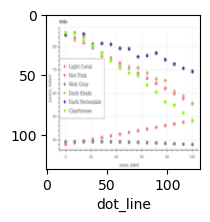

In [ ]:

image_sample(x_test,y_test,15) 
image_classes[y_classes[15]] 

In [ ]:

print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.37      0.19      0.25        37
           1       0.59      0.86      0.70        44
           2       0.59      0.35      0.44        48
           3       0.38      0.61      0.47        33
           4       0.72      0.68      0.70        38

    accuracy                           0.54       200
   macro avg       0.53      0.54      0.51       200
weighted avg       0.54      0.54      0.52       200



In [ ]:


conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[ 7 18  0  4  8]
 [ 0 38  1  4  1]
 [ 6  5 17 20  0]
 [ 0  1 11 20  1]
 [ 6  2  0  4 26]]


Text(95.72222222222221, 0.5, 'Actual')

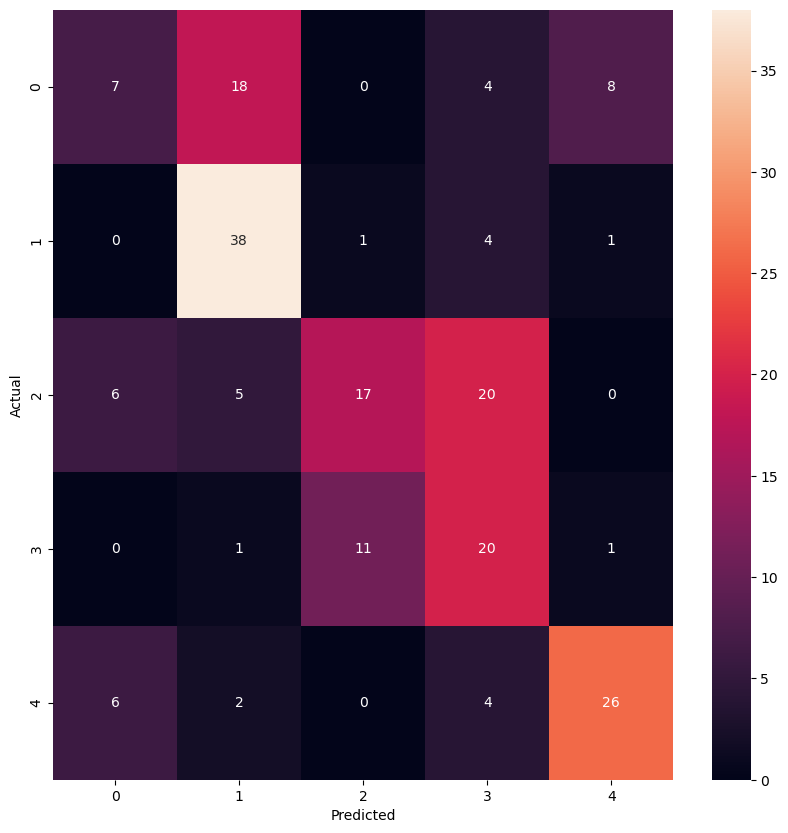

In [ ]:

import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [ ]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:

x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)

In [ ]:

for layer in pt_model.layers:
 layer.trainable = False

In [ ]:

pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

pt_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:

train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=20,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = train_datagen.flow(x_test, y_test, batch_size=32)

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
history = pt_model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[es])

Epoch 1/100


ValueError: in user code:

    File "C:\Users\chand\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\chand\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\chand\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\chand\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\chand\anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\chand\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\chand\anaconda3\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\chand\anaconda3\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\chand\anaconda3\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\chand\anaconda3\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 5) are incompatible
